In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from matplotlib import cm

In [2]:
Tot = np.load('total.npy')

In [3]:
print(Tot.shape)

(358918, 8)


In [4]:
Full = max(Tot[:,3])
FullE = Tot[Tot[:,3]==Full] #Creates array of only full energy deposition
Conc = Tot[(Tot[:,3]<Full) & (Tot[:,6]>0)] #Creates array of less than full energy deposition - Concrete Scattered
Asph = Tot[(Tot[:,3]<Full) & (Tot[:,6]<=0)] #Creates array of less than full energy deposition - Asphault Scattered
print(FullE.shape)
print(Conc.shape)
print(Asph.shape)

(110291, 8)
(225961, 8)
(22666, 8)


In [5]:
#Confirms constant r of 750 cm for all datapoints 
r = np.sqrt(Tot[:,0]**2+Tot[:,1]**2)
print(r)

[750.00006 749.99994 750.      ... 750.      750.      750.     ]


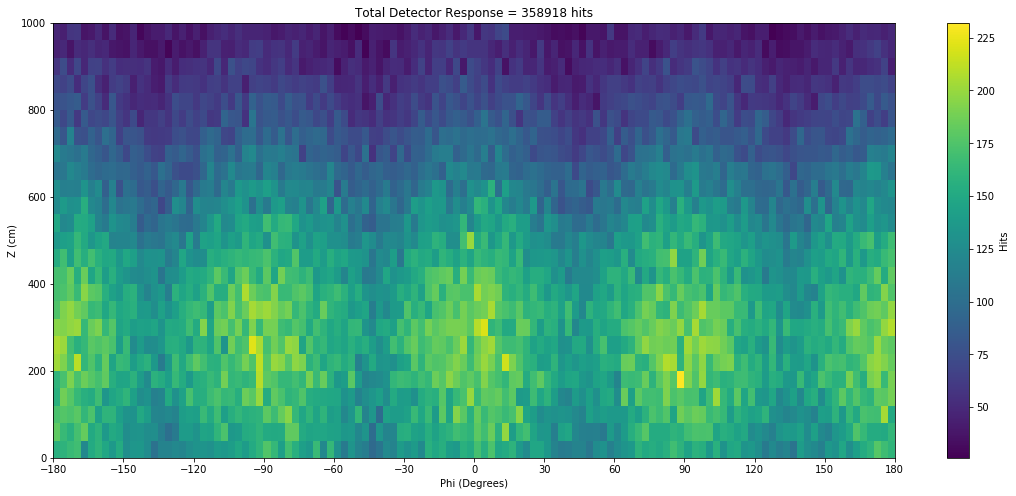

In [6]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap1, _, __ = np.histogram2d(Tot[:,7],Tot[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
im1 = plt.imshow(heatmap1.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
# plt.xlim(100, 180)
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Total Detector Response = ' + str(len(Tot)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/1Total_.png')
plt.show()

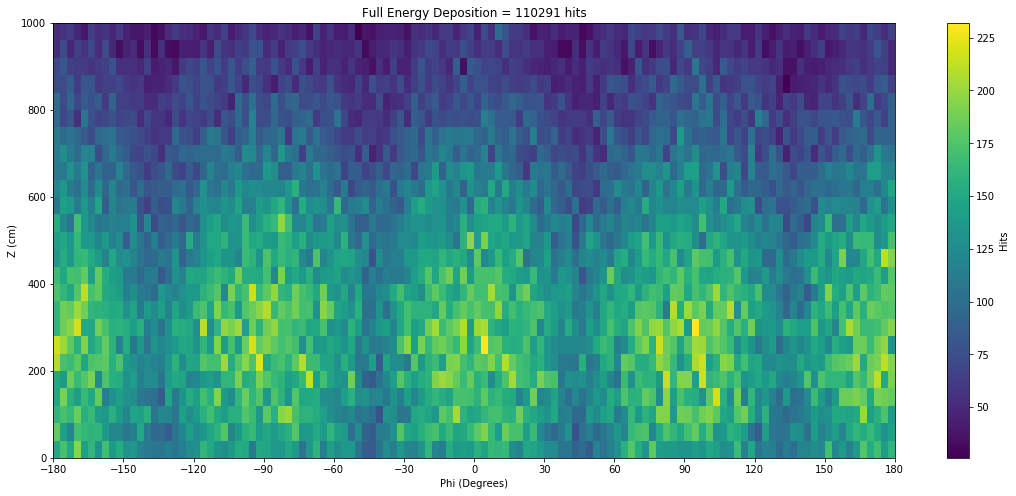

In [7]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap2, _, __ = np.histogram2d(FullE[:,7],FullE[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap2.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Full Energy Deposition = ' + str(len(FullE)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/2FullE_.png')
plt.show()

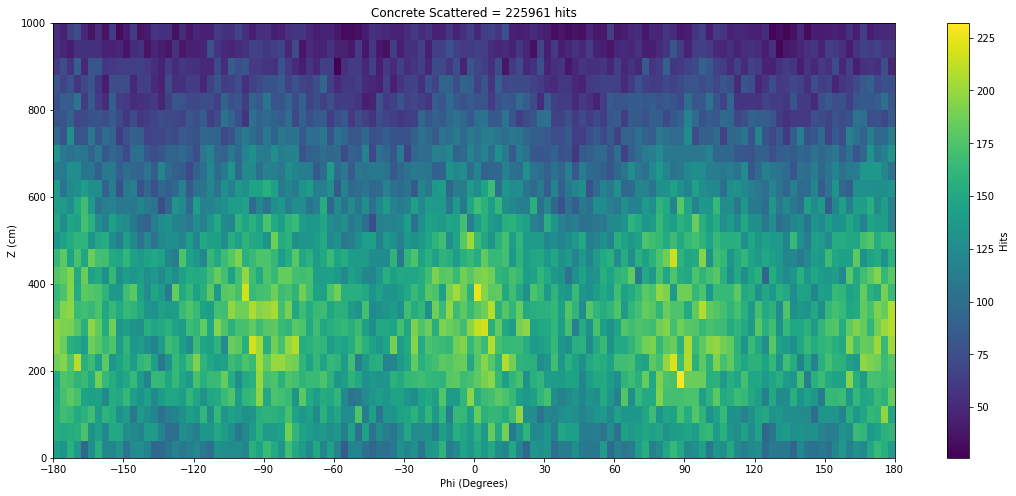

In [8]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap3, _, __ = np.histogram2d(Conc[:,7],Conc[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap3.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Concrete Scattered = ' + str(len(Conc)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/3Concrete_Scatter_.png')
plt.show()

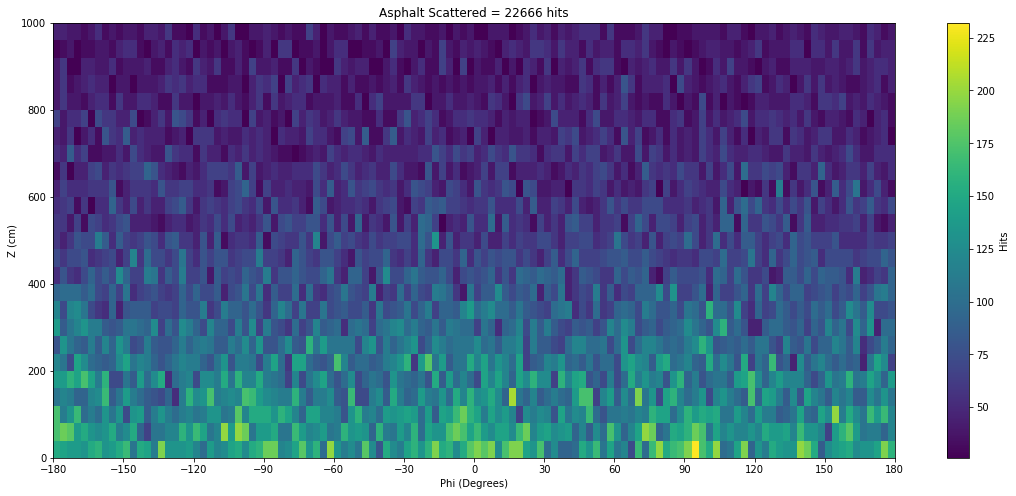

In [9]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap4, _, __ = np.histogram2d(Asph[:,7],Asph[:,2], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap4.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Asphalt Scattered = ' + str(len(Asph)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('images/4Asphalt_Scatter_.png')
plt.show()

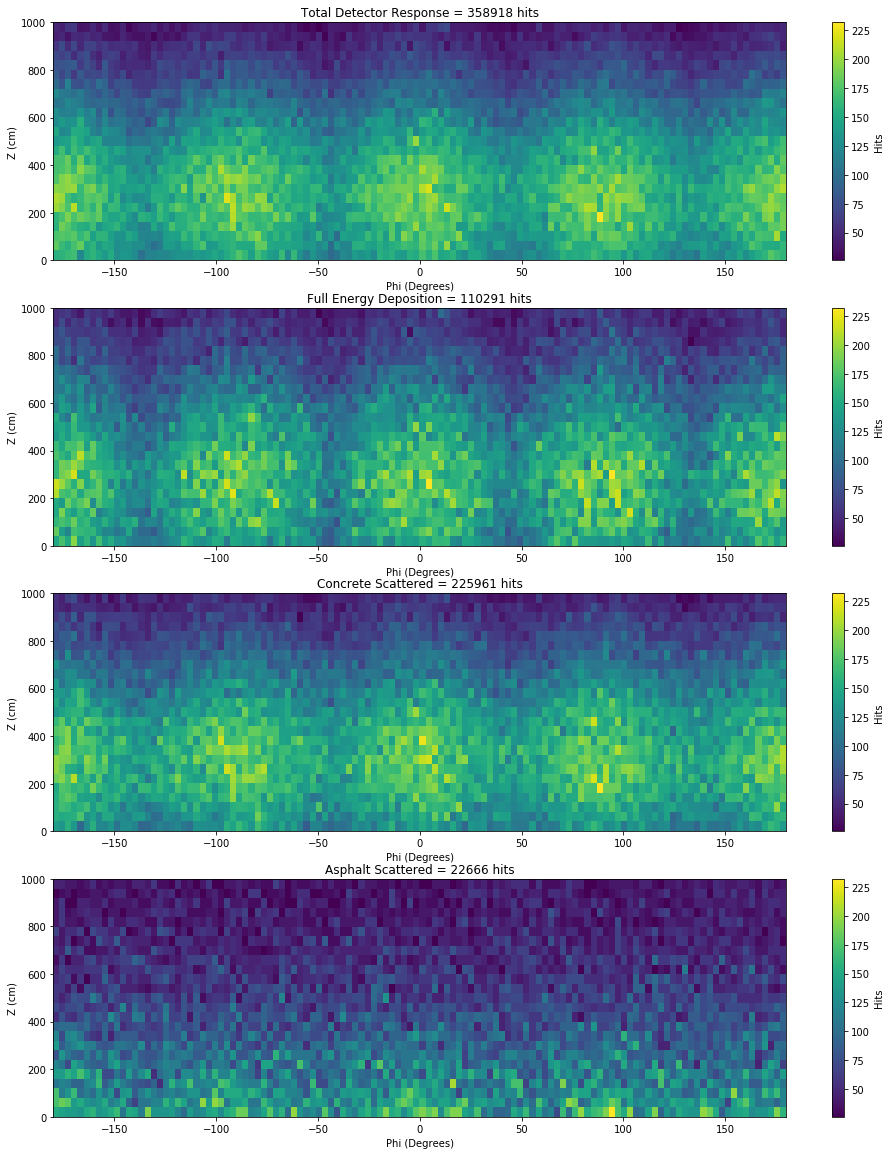

In [10]:
plt.clf()
plt.figure(figsize=(18.8496,8)) 

plt.subplot(411)
plt.imshow(heatmap1.T, extent=extent, aspect='auto', origin='lower')
plt.title('Total Detector Response = ' + str(len(Tot)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(412)
plt.imshow(heatmap2.T, extent=extent, aspect='auto', origin='lower')
plt.title('Full Energy Deposition = ' + str(len(FullE)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(413)
plt.imshow(heatmap3.T, extent=extent, aspect='auto', origin='lower')
plt.title('Concrete Scattered = ' + str(len(Conc)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(414)
plt.imshow(heatmap4.T, extent=extent, aspect='auto', origin='lower')
plt.title('Asphalt Scattered = ' + str(len(Asph)) +' hits')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')

plt.subplots_adjust(bottom=0.1, right=0.8, top=2,)
plt.savefig('images/5Det_Comparison_.png', bbox_inches='tight')
plt.show()


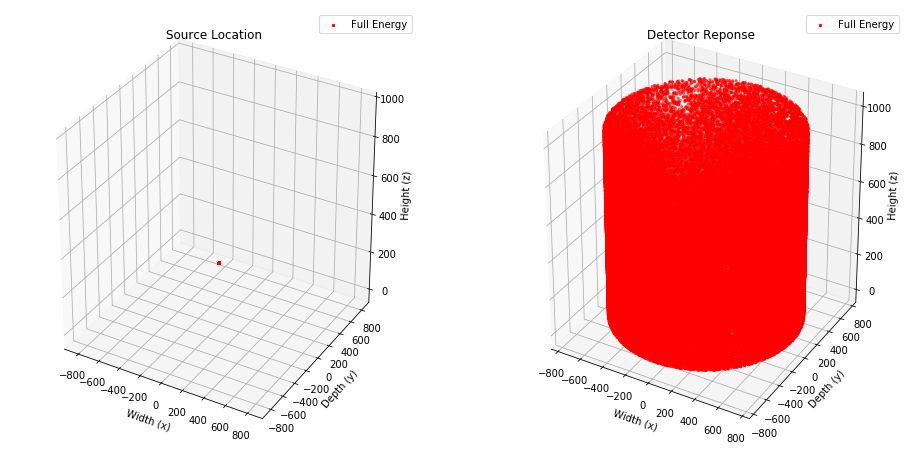

In [11]:
fig = plt.figure(figsize=(16,8))
#plt.suptitle('Am-241 Response Comparison', fontsize=16)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(FullE[:,0], FullE[:,1], FullE[:,2], s=5, c='r', marker="o",label='Full Energy')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Detector Reponse')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(FullE[:,4], FullE[:,5], FullE[:,6], s=5, c='r', marker="o",label='Full Energy')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/6FullE3D_.png')
plt.show()

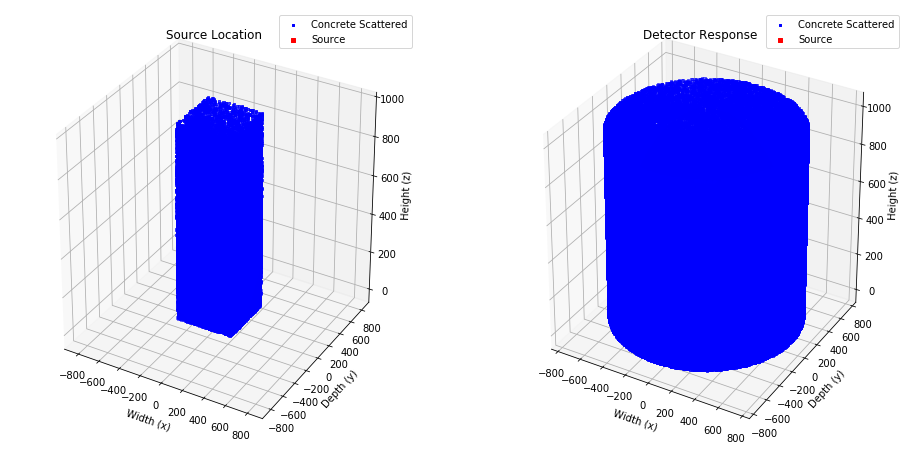

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(Conc[:,0], Conc[:,1], Conc[:,2],s=5, c='b', marker="s",label='Concrete Scattered')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Detector Response')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Conc[:,4], Conc[:,5], Conc[:,6],s=5, c='b', marker="s",label='Concrete Scattered')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/7Concrete_Scat_3D_.png')
plt.show()

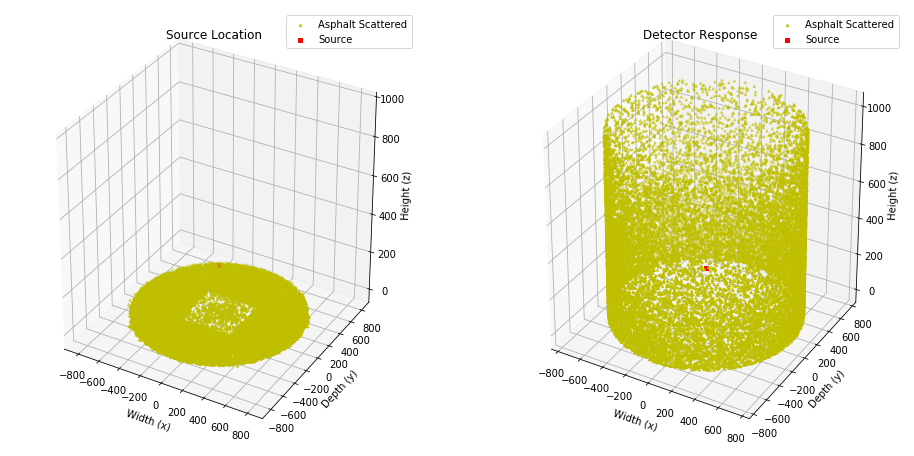

In [13]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(Asph[:,0], Asph[:,1], Asph[:,2],s=5, c='y', marker="^",label='Asphalt Scattered')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Detector Response')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Asph[:,4], Asph[:,5], Asph[:,6],s=5, c='y', marker="^",label='Asphalt Scattered')
ax.scatter(0, 0, 250, s=15, c='r', marker='s', label='Source')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/8Asphalt_Scat_3D_.png')
plt.show()

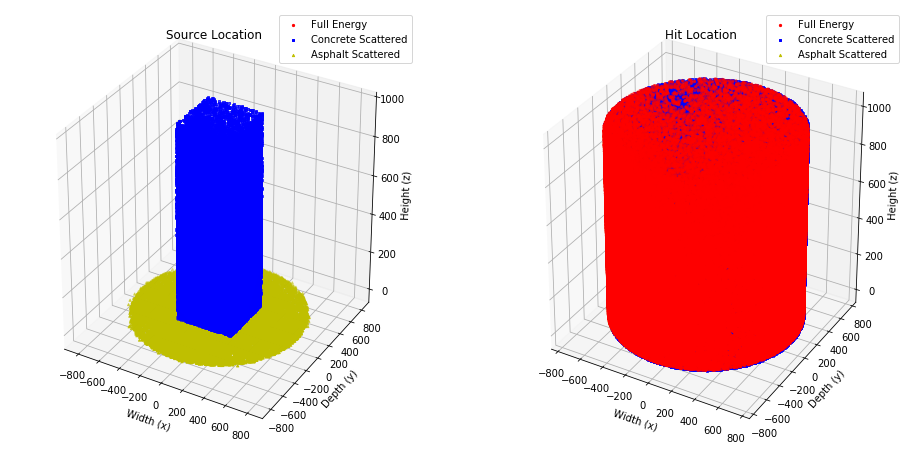

In [14]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(FullE[:,0], FullE[:,1], FullE[:,2], s=5, c='r', marker="o",label='Full Energy')
ax.scatter(Conc[:,0], Conc[:,1], Conc[:,2],s=5, c='b', marker="s",label='Concrete Scattered')
ax.scatter(Asph[:,0], Asph[:,1], Asph[:,2],s=5, c='y', marker="^",label='Asphalt Scattered')
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Hit Location')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(FullE[:,4], FullE[:,5], FullE[:,6], s=5, c='r', marker="o",label='Full Energy')
ax.scatter(Conc[:,4], Conc[:,5], Conc[:,6],s=5, c='b', marker="s",label='Concrete Scattered')
ax.scatter(Asph[:,4], Asph[:,5], Asph[:,6],s=5, c='y', marker="^",label='Asphalt Scattered')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
plt.legend(loc='best');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Source Location')
plt.savefig('images/9Combined3D_.png')
plt.show()

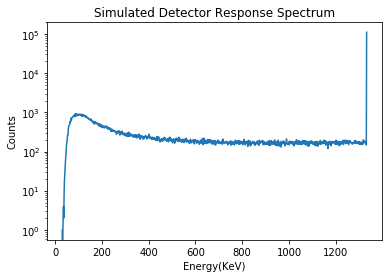

In [15]:
Spectra = np.histogram(Tot[:,3], bins=1000)
plt.semilogy(Spectra[1][1:],Spectra[0])
plt.title('Simulated Detector Response Spectrum')
plt.xlabel('Energy(KeV)')
plt.ylabel('Counts')
plt.show()

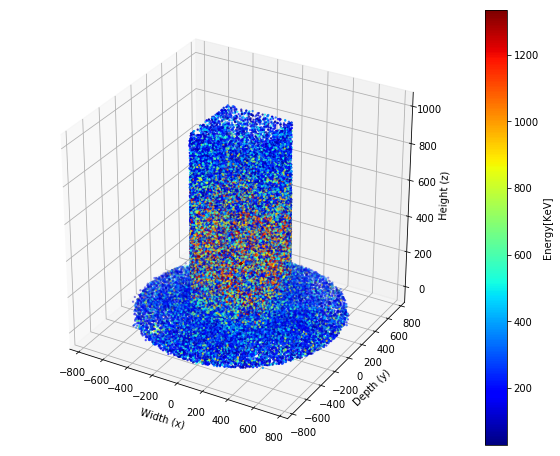

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
p = ax.scatter(Tot[:,4], Tot[:,5], Tot[:,6], c=Tot[:,3], lw=0, s=5, cmap='jet')
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
cb=fig.colorbar(p)
cb.set_label('Energy[KeV]')
plt.savefig('images/15Heatmap3D_.png')
plt.show()

In [17]:
# intersection function
def isect_line_plane_v3(p0, p1, p_co, p_no, epsilon=1e-6):
    """
    p0, p1: define the line - p0 is last point in air/material and p1 is detector interaction point
    p_co, p_no: define the plane:
        p_co is a point on the plane (plane coordinate).
        p_no is a normal vector defining the plane direction;
             (does not need to be normalized).

    return a Vector or None (when the intersection can't be found).
    """

    u = p0-p1
    dot = np.dot(p_no, u)

    if abs(dot) > epsilon:
        # the factor of the point between p0 -> p1 (0 - 1)
        # if 'fac' is between (0 - 1) the point intersects with the segment.
        # otherwise:
        #  < 0.0: behind p0.
        #  > 1.0: infront of p1.
        w = p0-p_co
        fac = -np.dot(p_no, w) / dot
        u = u*fac
        return p0+u
    else:
        # The segment is parallel to plane
        return None

In [18]:
#Defining Asphault Surface
p1 = np.array([0, -255, 0]) #Bottom Center Point
p2 = np.array([-255, 255, 0]) #Top Left Point
p3 = np.array([255, 255, 0]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 0x + 0y + 260100z = 0


In [19]:
intersections = []
for i in range(len(Asph)):
    spoint=np.array([Asph[:,4][i], Asph[:,5][i], Asph[:,6][i]])
    hpoint=np.array([Asph[:,0][i], Asph[:,1][i], Asph[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

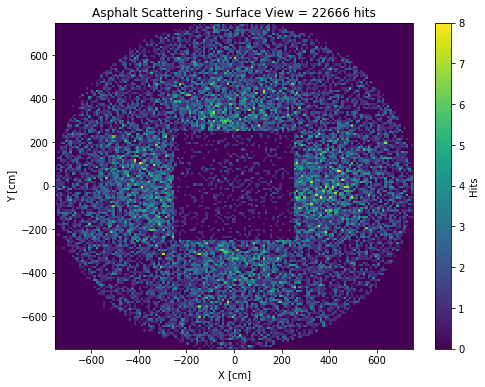

In [20]:
gx,gy,gz = map(list,zip(*intersections))
xedges = np.arange(-750.0, 750.1, 10.)
yedges = np.arange(-750.0, 750.1, 10.)
heatmap5, _, __ = np.histogram2d(gx,gy, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(8,6))
plt.imshow(heatmap5.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Asphalt Scattering - Surface View = ' + str(len(Asph)) +' hits')
plt.xlabel('X [cm]')
plt.ylabel('Y [cm]')
plt.savefig('images/10Asphalt_Scattered_Surface.png')
plt.show()

In [21]:
North = Tot[(Tot[:,7]<135) & (Tot[:,7]>45) & (Tot[:,6]>0)] #Creates array of interactions in the North Wall
South = Tot[(Tot[:,7]<-45) & (Tot[:,7]>-135) & (Tot[:,6]>0)] #Creates array of interactions in the South Wall
East = Tot[(Tot[:,7]<45) & (Tot[:,7]>-45) & (Tot[:,6]>0)] #Creates array of interactions in the East Wall
West1 = Tot[(Tot[:,7]<-135) & (Tot[:,6]>0)] #Creates array of interactions in the West Wall 
West2 = Tot[(Tot[:,7]>135) & (Tot[:,6]>0)] #Creates array of interactions in the West Wall
West = np.vstack((West1,West2))

In [22]:
#Defining North Wall Surface
p1 = np.array([0, 255, 0]) #Bottom Center Point
p2 = np.array([-255, 255, 1000]) #Top Left Point
p3 = np.array([255, 255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 0x + -510000y + 0z = -130050000


In [23]:
intersections = []
for i in range(len(North)):
    spoint=np.array([North[:,4][i], North[:,5][i], North[:,6][i]])
    hpoint=np.array([North[:,0][i], North[:,1][i], North[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

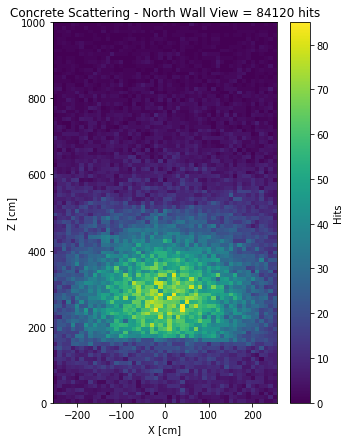

In [24]:
nx,ny,nz = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap6, _, __ = np.histogram2d(nx,nz, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap6.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - North Wall View = ' + str(len(North)) +' hits')
plt.xlabel('X [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/11Concrete_Scattered_North.png')
plt.show()

In [25]:
#Defining South Wall Surface
p1 = np.array([0, -255, 0]) #Bottom Center Point
p2 = np.array([-255, -255, 1000]) #Top Left Point
p3 = np.array([255, -255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 0x + -510000y + 0z = 130050000


In [26]:
intersections = []
for i in range(len(South)):
    spoint=np.array([South[:,4][i], South[:,5][i], South[:,6][i]])
    hpoint=np.array([South[:,0][i], South[:,1][i], South[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

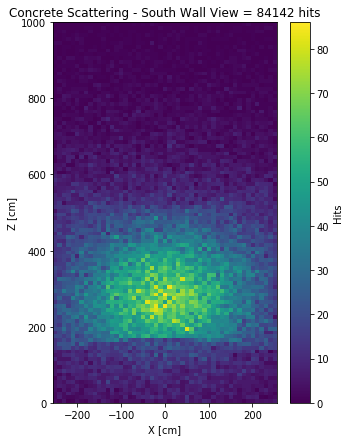

In [27]:
sx,sy,sz = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap7, _, __ = np.histogram2d(sx,sz, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap7.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - South Wall View = ' + str(len(South)) +' hits')
plt.xlabel('X [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/12Concrete_Scattered_South.png')
plt.show()

In [28]:
#Defining East Wall Surface
p1 = np.array([255, 0, 0]) #Bottom Center Point
p2 = np.array([255, 255, 1000]) #Top Left Point
p3 = np.array([255, -255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is -510000x + 0y + 0z = -130050000


In [29]:
intersections = []
for i in range(len(East)):
    spoint=np.array([East[:,4][i], East[:,5][i], East[:,6][i]])
    hpoint=np.array([East[:,0][i], East[:,1][i], East[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

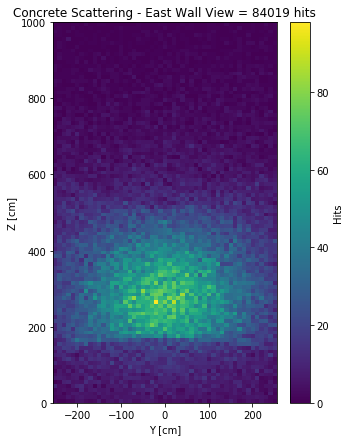

In [30]:
ex,ey,ez = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap8, _, __ = np.histogram2d(ey,ez, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap8.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - East Wall View = ' + str(len(East)) +' hits')
plt.xlabel('Y [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/13Concrete_Scattered_East.png')
plt.show()

In [31]:
#Defining West Wall Surface
p1 = np.array([-255, 0, 0]) #Bottom Center Point
p2 = np.array([-255, -255, 1000]) #Top Left Point
p3 = np.array([-255, 255, 1000]) #Top Right Point
# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1
# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp
# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)
print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

The equation is 510000x + 0y + 0z = -130050000


In [32]:
intersections = []
for i in range(len(West)):
    spoint=np.array([West[:,4][i], West[:,5][i], West[:,6][i]])
    hpoint=np.array([West[:,0][i], West[:,1][i], West[:,2][i]])
    o = isect_line_plane_v3(spoint,hpoint, p1, cp)
    intersections.append(o)

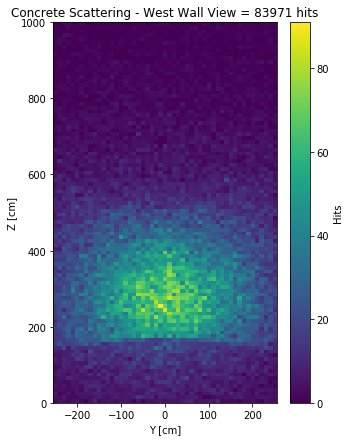

In [33]:
wx,wy,wz = map(list,zip(*intersections))
xedges = np.arange(-255.0, 255.1, 10.)
yedges = np.arange(0.0, 1000.1, 10.)
heatmap9, _, __ = np.histogram2d(wy,wz, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(5,7))
plt.imshow(heatmap9.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Concrete Scattering - West Wall View = ' + str(len(West)) +' hits')
plt.xlabel('Y [cm]')
plt.ylabel('Z [cm]')
plt.savefig('images/14Concrete_Scattered_West.png')
plt.show()

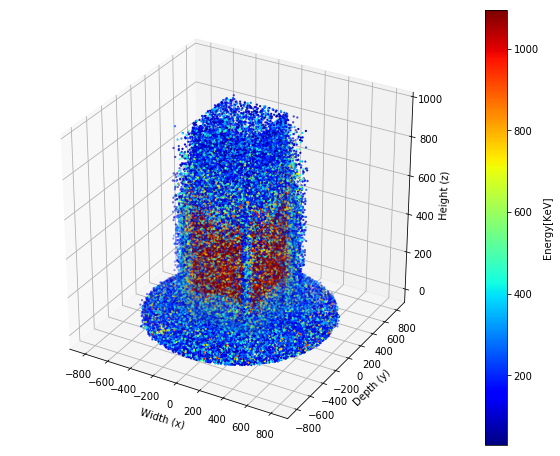

In [38]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
p = ax.scatter(gx, gy, gz, c=Asph[:,3], lw=0, s=5, cmap='jet')
ax.scatter(nx, ny, nz, c=North[:,3], lw=0, s=5, cmap='jet')
ax.scatter(sx, sy, sz, c=South[:,3], lw=0, s=5, cmap='jet')
ax.scatter(ex, ey, ez, c=East[:,3], lw=0, s=5, cmap='jet')
ax.scatter(wx, wy, wz, c=West[:,3], lw=0, s=5, cmap='jet')
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
ax.set_xlim3d(-900,900)
ax.set_ylim3d(-900,900)
ax.set_zlim3d(-50,1000)
cb=fig.colorbar(p)
cb.set_label('Energy[KeV]')
plt.savefig('images/16Heatmap3D_.png')
plt.show()